<a href="https://colab.research.google.com/github/yvzn/news-catch-up/blob/main/News_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# News classification

Given a set of news headlines from different sources, use an embedding model to detect potentially similar news titles.

Inspired from short course [Embedding Models: from Architecture to Implementation](https://learn.deeplearning.ai/courses/embedding-models-from-architecture-to-implementation) on DeepLearning.AI


## Install dependencies

- SBERT (embedding model)
- Seaborn and Numpy (data visualisation)

In [ ]:
import sys
!{sys.executable} -m pip install -U sentence-transformers numpy seaborn

## Build news dataset

From Google News (online)

*   Visit [Google News](https://news.google.com/home?hl=en-US&gl=US&ceid=US:en)
*   List news headlines `$$('a[href^="./read"]').map(a => a.innerText)`

In [ ]:
messages_1 = ['Trump rules out another presidential debate against Harris', 'Why Trump ditched a debate rematch – for now', "Stephen King Mocks Trump's Debate Refusal: 'One Ass-Kicking Was Enough'", 'Trump says he won’t debate Harris again before election', 'Russia Expels 6 U.K. Diplomats as Tensions Mount Over Missiles', 'Russia expels 6 British diplomats amid spat over long-range weapons', "Russia Ukraine war live: UK says Russia spy claims…less' as Putin escalates row over Ukraine weapons", 'Russia expels U.K. diplomats; Putin warns against deep strikes with Western weapons', 'China is raising its retirement age, now among the youngest in the world’s major economies', 'Taylor Swift’s Kamala Harris Endorsement Referenced In Times Square & Las Vegas Ads', 'Cave discovery in France may explain why Neanderthals disappeared, scientists say', 'DHL sues MyPillow, alleging company founded by Mike Lindell owes $800,000', 'Teacher admits having sex with 16-year-old boy — l…n his back — as other students served as lookouts', "Linda Ronstadt's Vicious One-Line Takedown Of Donald Trump Is Going Super Viral", 'Actor James Hollcroft Found Dead at 26 - E! Online', 'US Teacher Used Students As "Lookouts" While She Had Sex With Teen', 'Dragon Age: The Veilguard – Exclusive First Hands-On Preview', 'ABC News rebuked by pro-life group, asked for correction of abortion claim by debate moderator', "James Cook's three TDs, Ja'Marcus Ingram pick-six keying big night for Bills", 'Trump’s message of American decline resonates in Michigan', 'Exclusive: US locks in steep China tariff hikes, many to start Sept. 27', 'White House de minimis loophole rules target Shein, Temu', 'Russia expels six UK diplomats as tensions rise over Ukraine missiles', 'For Years, Chinese Workers Could Retire at 50. Now, China Can’t Afford It.', 'Kim Jong Un’s Latest Flaunt: A Secret Nuclear Site Now Shown in Public', 'Chad McQueen, ‘Karate Kid’ actor and son of Steve McQueen, dies at 63', 'Shōgun and Baby Reindeer set to dominate the Emmys – the second ceremony in 2024', '2024 MTV VMAs: Travis Kelce Reacts to Taylor Swift’s Acceptance Speech Shoutout - E! Online', 'Elizabeth Hurley Refuses To Be Bullied Into Creati…ontent, Josh Allen Kicks Out Dolphins Fan & MEAT!', 'Princess Beatrice and Princess Eugenie poised for promotion amid exciting new roles', 'Whoopi Goldberg Tells JD Vance to ‘Stop Talking’ A…Most Americans: ‘You Don’t Know What Affects Her’', 'Ben & Jerry’s co-founders unveil Kamala Harris ice cream flavor', 'Miami’s Museum of Ice Cream returns with sprinkles, slides and sweet surprises!', 'Little Italy’s Feast of San Gennaro pays homage to martyred bishop with music and food', "CWA slams Microsoft over 'extremely disappointing' layoffs", 'Annapurna Interactive Video Game Staff Resigns (Report)', 'Embracer’s potential sale cancelled for Metro’s 4A Games and Pinball dev Zen Studios', 'Argument over LGBTQ issues at Montreal protest unrelated to Gaza war', 'Fact Check: Trump Shares Misleading Video About Animal Abuse After Debate', "Did Trump Say Taylor Swift Would 'Pay a Price' for Endorsing Harris?", 'FACT CHECK: Taylor Swift is not endorsing Donald Trump', 'Novel Architecture Makes Neural Networks More Understandable', 'Unwilling to Be Human Shields, Some Gazans Turn Gunmen Away From Shelters', 'Inside Google’s 7-Year Mission to Give AI a Robot Body', 'Hypocrisy, Spinelessness, and the Triumph of Donald Trump']

From BBC.co.uk (online)

*   Visit [BBC.co.uk](https://www.bbc.com/)
*   List news headlines `Array.from(new Set($$('h2[data-testid=card-headline]').map(a => a.innerText)))`

In [ ]:
messages_2 = ['Putin draws new red line on long-range missiles', 'China raises retirement age for first time since 1950s', "UK says Russia spy claims are 'baseless' as Putin escalates row over Ukraine weapons", 'Laura Loomer: Who is conspiracy theorist travelling with Trump?', 'US freight train crashes into military vehicle', 'A baby hippo is going viral - and paying the price', 'North Korea releases rare photos of Kim at uranium facility', 'Gladiator II to The Day of the Jackal: The best culture to look forward to this autumn', 'The 12-day flight across the world in a 60-year-old plane', 'Russia can end war now, says British PM as Putin warns West', 'Central Europe braced for worst flooding in years', 'Adani Group denies Swiss officials froze $310m fund', 'Butterfly thieves handed $200,000 fine', 'Trump rules out another presidential debate against Harris', 'Cristiano Ronaldo hits 1bn social media followers', "Israeli special forces 'raid missile site in Syria'", 'UK accounting giant PwC faces six-month China ban', 'John Legend: Why abortion issue is personal for Chrissy Teigen and me', 'Moment Banksy artwork stolen from London gallery', 'Entangled whale freed from nets after four-day rescue', 'Key moments from first non-professional spacewalk', "Bulgaria's valley of Thracian Kings and Damask roses", 'Hurricane Francine slams southern US with flooding rains', 'Orange skies and burned homes as wildfires spread near LA', "Haas drive 'a step towards' dream F1 world championship - Bearman", "The US state where 'America drinks its way to health'", "Crime writer Richard Osman: 'I'm terrible at playing detective'", 'Trump repeats baseless claim about Haitian immigrants eating pets', 'US election polls: Who is ahead - Harris or Trump?', 'Surprise return to Botswana by ex-president to face trial', 'US Election Unspun: Sign up for our newsletter', 'Germany to welcome 250,000 Kenyans in labour deal', 'Russia accuses six British diplomats of spying', 'Solheim Cup: USA lead 3-1 against Europe after foursomes session on day one', 'WSL deadline day latest and Premier League news conferences recap', "Davis Cup: GB's Draper breaks as Cerundolo serves for set - watch & text", 'Guardiola happy Man City hearing to begin on Monday', 'Boeing workers strike as 25% pay rise rejected', "New beanless 'coffee' emerges but does it taste any good?", 'Ex-Ticketmaster boss sentenced for hacking rival company CrowdSurge', 'Second-hand bedding a hit at St Andrews University', 'How much will AI help in the next pandemic?', "'Earth sure looks like a perfect world': First private spacewalk a success", "Royal Observatory's photographer of the year won with eclipse image", 'Banana wine brings sweet taste of success to Malawi farmers', 'How to reduce wrinkles and keep your skin healthy', "'Vintage has become its own luxury status symbol'", 'The Force is with Ewan: McGregor gets Hollywood Walk of Fame star', "Inside the spectacular 'Olympics' of the nomadic world", "Five of Sydney's best waterfront restaurants", 'How water shaped New York City', 'Mystery tremors were from massive nine-day tsunami', 'What are the Northern Lights?', 'The Bahamas: The last lighthouse of its kind', "Protecting Thailand's famous 'paradise beach'", "Earth's spectacular and remote 'capital' of lightning", 'World of Business', 'US Election Unspun', 'The Essential List', 'News Briefing', 'Jury discharged in Pro-Palestine protest trial', 'UN says Israeli strike on Gaza school killed six of its staff', 'Israeli strikes in West Bank kill eight Palestinians, paramedics say', "Russia's targeting of 'enemies within' evokes ghosts of the Soviet past", 'Russia claims start of fightback in Kursk region', 'Stephen Lawrence would have been 50 today. Is there still a chance to get justice for him?', 'The great gene editing debate: Can it be safe and ethical?', 'A tent city next to Mayfair: Why cutting homelessness might be harder than before', "Why is the Pope doing a long tour when he's so frail?"]

From The NY Times (online)

*   Visit [NY Times](https://www.nytimes.com/)
*   List news headlines `Array.from(new Set($$('p.css-91bpc3').map(a => a.innerText)))`


In [ ]:
messages_3 = ['A Fight for Control at the Gaza-Egypt Border', 'Kamala Harris or Donald Trump? Election Results Could Take a While, Again.', 'Political Memes Spill Off the Internet Into the Reality of Campaigning', 'Christian Conservatives Face Reality: Increasingly, They Stand Alone', 'Russia Expels 6 U.K. Diplomats as Tensions Mount Over Missiles', 'Diplomacy Over Ukraine War Is About Weapons More Than Peace Talks', 'Inside Elon Musk’s Mushrooming Security Apparatus', 'Affirmative Action Was Banned. What Happened Next Was Confusing.', 'Future of Murdoch Empire Comes Down to a Court in Nevada', 'The Mortal American Dream of Alberto Castañeda Aco', 'The Big City Is Vibrant. Birds There Might Be Getting Less So.', 'Boeing Workers Walk Off the Job in First Strike Since 2008', 'The Fight Against Three Major Wildfires in Southern California: What We Know', 'A New Mini-Moon Is Being Captured by Earth’s Gravity', 'Jessica Ramos Will Run for Mayor Against Eric Adams', 'Biden Administration Ratchets Up Tariffs on Billions of Dollars of Chinese Goods', 'Tua Tagovailoa’s Concussion Has Former N.F.L. Players Urging Him to Retire', 'When Asked About Taylor Swift and Kamala Harris, Caitlin Clark Pivoted', 'How a Formula 1 Star Drove a Car Made of Legos']

Build the dataset

In [ ]:
messages = messages_1

## Build sentence embeddings

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
embeddings = []
for t in messages:
    emb = list(model.encode(t))
    embeddings.append(emb)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## Visualization

In [ ]:
import numpy as np
import seaborn as sns

def cosine_similarity_matrix(features):
    norms = np.linalg.norm(features, axis=1, keepdims=True)
    normalized_features = features / norms
    similarity_matrix = np.inner(normalized_features, normalized_features)
    rounded_similarity_matrix = np.round(similarity_matrix, 4)
    return rounded_similarity_matrix

# Helper function to plot similarity matrix
def plot_similarity(labels, features, rotation):
    sim = cosine_similarity_matrix(features)
    sns.set_theme(font_scale=1)
    g = sns.heatmap(sim, xticklabels=labels, yticklabels=labels, vmin=0, vmax=1, cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")
    return g

<Axes: title={'center': 'Semantic Textual Similarity'}>

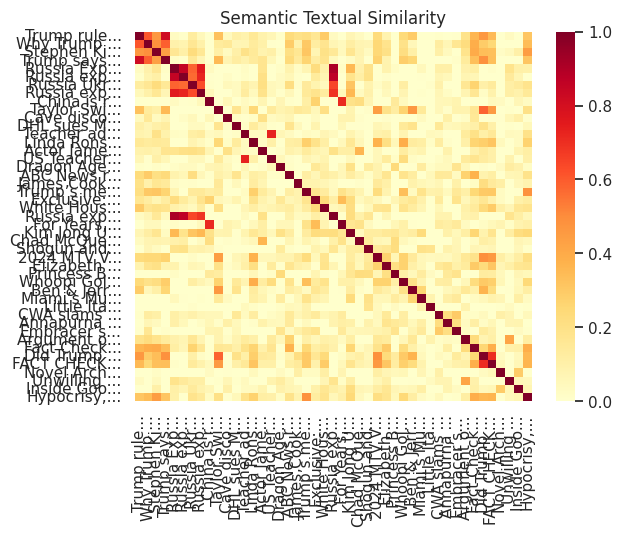

In [ ]:
plot_similarity([f'{m[0:10]}...' for m in messages], embeddings, 90)